In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

In [3]:
train.head(20)
test.head(20)
train.shape
test.shape
train.info()
test.info()
train.isnull().sum()
test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 범주형 -> 바 차트

def barChart(f):
    survived = train[train['Survived']==1][f].value_counts()
    dead = train[train['Survived']==0][f].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked = True)
    plt.xticks(rotation = 0)
    return df

남성보다 여성이 많이 생존한 것으로 보입니다.
무닐주 메롱메롱

,female,male
Survived,233,109
Dead,81,468


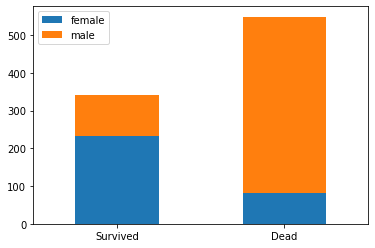

In [6]:
barChart('Sex') #성별에 따ㅏ른 생존자 사망자 시각화

,1,2,3
Survived,136,87,119
Dead,80,97,372


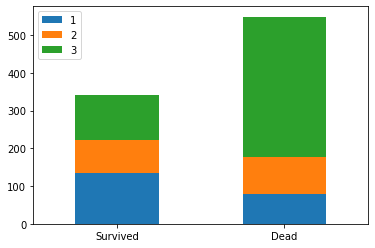

In [7]:
barChart('Pclass') #성별에 따ㅏ른 생존자 사망자 시각화

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


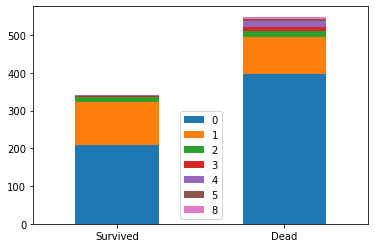

In [8]:
barChart('SibSp')

,0,1,2,3,4,5,6
Survived,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


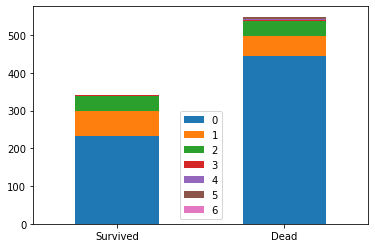

In [9]:
barChart('Parch')

,S,C,Q
Survived,217,93,30
Dead,427,75,47


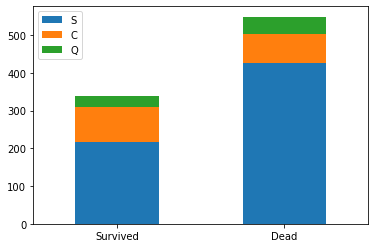

In [10]:
barChart('Embarked')

feature engineering     
특성공학: 머신러닝을 위한 데이터 전처리 


In [11]:
trainTestData = [train, test] # 2개의 데이터 프레임이 묶여서 리스트를 형성
trainTestData

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [12]:
for d in trainTestData:
    d['title'] = (d['Name'].str.extract(" ([A-Za-z]+)\."))

#공백 다음에 소괄호, 소괄호 내부에는 영문자 1글자 이상, 마지막글자에는 점(.)으로 끝나야함

In [13]:
train['title'].value_counts()
# test['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Sir           1
Capt          1
Countess      1
Lady          1
Mme           1
Don           1
Ms            1
Jonkheer      1
Name: title, dtype: int64

In [14]:
tm = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Major':3, 'Mlle':3, 'Col':3, 'Ms':3, 'Don':3, 'Jonkheer':3, 'Countess':3, 'Capt':3,'Sir':3, 'Lady':3, 'Mme':3}

In [15]:
tm = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Dr':3, 'Rev':3, 'Major':3, 'Mlle':3, 'Col':3, 'Ms':3, 'Don':3, 'Jonkheer':3, 'Countess':3, 'Capt':3,'Sir':3, 'Lady':3, 'Mme':3}

for data in trainTestData:
    data['title'] = data['title'].map(tm)

In [16]:
test['title'].value_counts()

0.0    240
1.0     78
2.0     72
3.0     27
Name: title, dtype: int64

,0,1,2,3
Survived,81,127,99,35
Dead,436,55,26,32


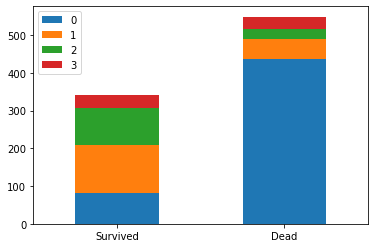

In [17]:
barChart('title')

In [18]:
train.drop('Name', axis = 1, inplace=True )
test.drop('Name', axis = 1, inplace=True )

In [19]:
tm = {'male':0, 'female':1}
for data in trainTestData:
    data['Sex'] = data['Sex'].map(tm)

,0,1
Survived,109,233
Dead,468,81


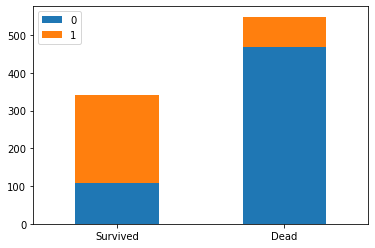

In [20]:
barChart('Sex')

In [21]:
train.head(50)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  title        891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


Mr 호칭 -> 나이 nan 이면 mr 의 나이 중간값으로 nan을 대체

In [22]:
train['Age'].fillna(train.groupby('title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('title')['Age'].transform('median'), inplace = True)


(0.0, 20.0)

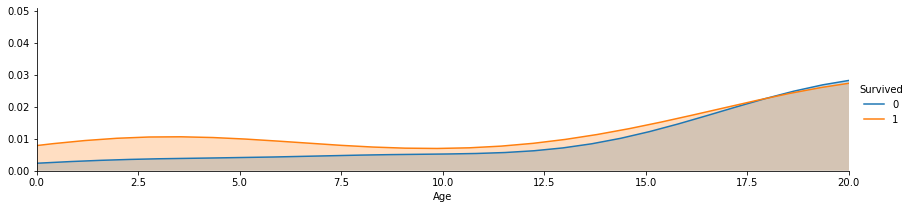

In [23]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4) #다중플랏그리드 구성
facet.map(sns.kdeplot, 'Age', shade = True)
facet.add_legend()
plt.xlim(0, 20)

In [24]:
train['Age'].describe() # 0.42세 ~ 80세

count    891.000000
mean      29.372806
std       13.227346
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
for data in trainTestData:
    data.loc[data.Age <= 16, 'Age'] = 0,
    data.loc[(data.Age > 16) & (data.Age <= 26), 'Age'] = 1,
    data.loc[(data.Age > 26) & (data.Age <= 36), 'Age'] = 2,
    data.loc[(data.Age > 36) & (data.Age <= 62), 'Age'] = 3,
    data.loc[data.Age > 62, 'Age'] = 4

,2.0,1.0,3.0,0.0,4.0
Survived,116,97,69,57,3
Dead,220,158,111,48,12


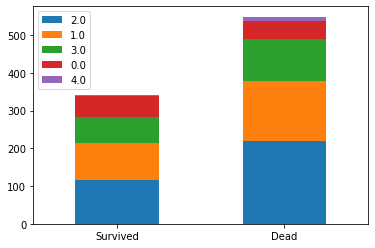

In [26]:
barChart('Age')

Pclass가 1인 승객이 승선한 항구별 승객수를 출력

In [27]:
Pclass1 = train[train.Pclass == 1]['Embarked'].value_counts()
Pclass2 =train[train.Pclass == 2]['Embarked'].value_counts()
Pclass3 =train[train.Pclass == 3]['Embarked'].value_counts()


In [28]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']

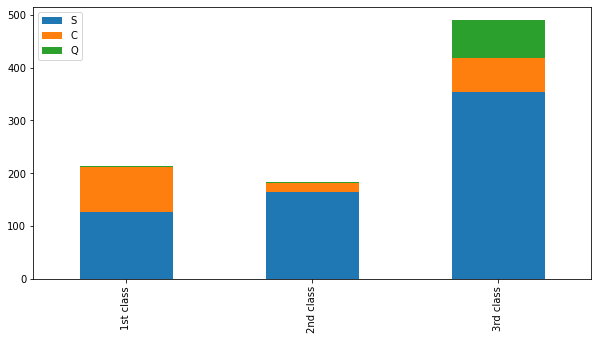

In [29]:
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [30]:
train['Embarked'] = train['Embarked'].fillna('S')

In [31]:
# S:0, C:1, Q:2
tm = {"S":0, "C":1, "Q":2}
for data in trainTestData:
    data['Embarked'] = data['Embarked'].map(tm)


In [32]:
# fare가 널인 데이터 출력

test[test.Fare.isnull() == True]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
152,1044,3,0,3.0,0,0,3701,NaN,NaN,0,0.0


In [33]:
test.groupby(['Embarked'])['Pclass'].mean()


Embarked
0    2.340741
1    1.794118
2    2.869565
Name: Pclass, dtype: float64

In [34]:
test.groupby(['Embarked', 'Pclass'])['Fare'].mean()[0][3]

13.91302978723404

In [35]:
test['Fare'] = test.fillna(test.groupby(['Embarked', 'Pclass'])['Fare'].mean()[0][3])

In [36]:
test.Fare.isnull().sum()

0

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    object 
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    int64  
 10  title        417 non-null    float64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


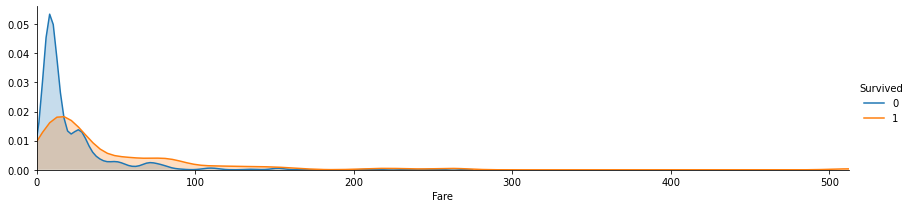

In [38]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4) #다중플랏그리드 구성
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.add_legend()
facet.set(xlim = (0, train.Fare.max()))
# plt.xlim(0, 20)

In [39]:
for data in trainTestData:
    data.loc[data.Fare <= 16, 'Fare'] = 0,
    data.loc[(data.Fare > 16) & (data.Fare <= 30), 'Fare'] = 1,
    data.loc[(data.Fare > 30) & (data.Fare <= 100), 'Fare'] = 2,
    data.loc[data.Fare > 100, 'Fare'] = 3

In [40]:
train.Cabin.value_counts() #객실번호


G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
              ..
C106           1
B80            1
C85            1
C49            1
C90            1
Name: Cabin, Length: 147, dtype: int64

In [41]:
for d in trainTestData:
    d['Cabin_1'] = (d['Cabin'].str.extract("([A-Z])"))

In [42]:
for data in trainTestData:
    data.Cabin = data.Cabin.str[:1]

# Pclass가 1인 캐빈 컬럼의 종류별 개수 출력        
cabin 컬럼값의 종류별 개수를 출력

In [43]:
Pclass1 = train[train.Pclass == 1]['Cabin'].value_counts()
Pclass2 = train[train.Pclass == 2]['Cabin'].value_counts()
Pclass3 = train[train.Pclass == 3]['Cabin'].value_counts()


In [44]:
print(Pclass1)
print(Pclass2)
print(Pclass3)


C    59
B    47
D    29
E    25
A    15
T     1
Name: Cabin, dtype: int64
F    8
E    4
D    4
Name: Cabin, dtype: int64
F    5
G    4
E    3
Name: Cabin, dtype: int64


In [45]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index =['1st class', '2nd class', '3rd class']
df


,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


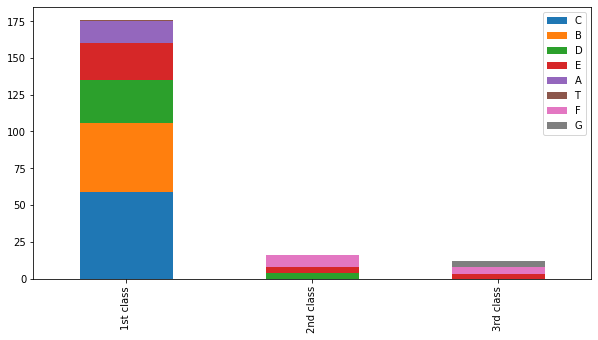

In [46]:
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [47]:
tm = {'A':0,'B':0.4,'C':0.8,'D':1.2,'E':1.6,'F':2.0,'G':2.4,'T':2.8}

for data in trainTestData:
    data['Cabin'] = data['Cabin'].map(tm)

# Pclass 별로 그룹화, 그룹별로 cabin 열 값에 대한 중앙값으로 결측값을 대체하세요


In [48]:
train.Cabin.fillna(train.groupby(['Pclass'])['Cabin'].transform('median'), inplace = True)
test.Cabin.fillna(test.groupby(['Pclass'])['Cabin'].transform('median'), inplace = True)


In [49]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_1
0,892,3,0,2.0,0,0,330911,3,2.0,2,0.0,NaN
1,893,3,1,3.0,1,0,363272,3,2.0,0,2.0,NaN
2,894,2,0,3.0,0,0,240276,3,2.0,2,0.0,NaN
3,895,3,0,2.0,0,0,315154,3,2.0,0,0.0,NaN
4,896,3,1,1.0,1,1,3101298,3,2.0,0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,3,2.0,0,0.0,NaN
414,1306,1,1,3.0,0,0,PC 17758,3,0.8,1,NaN,C
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,3,2.0,0,0.0,NaN
416,1308,3,0,2.0,0,0,359309,3,2.0,0,0.0,NaN


In [50]:
train['FamilySize'] = train.SibSp+train.Parch + 1
test['FamilySize'] = test.SibSp+train.Parch + 1

In [51]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cabin_1,FamilySize
0,892,3,0,2.0,0,0,330911,3,2.0,2,0.0,NaN,1.0
1,893,3,1,3.0,1,0,363272,3,2.0,0,2.0,NaN,2.0
2,894,2,0,3.0,0,0,240276,3,2.0,2,0.0,NaN,1.0
3,895,3,0,2.0,0,0,315154,3,2.0,0,0.0,NaN,1.0
4,896,3,1,1.0,1,1,3101298,3,2.0,0,2.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,2.0,0,0,A.5. 3236,3,2.0,0,0.0,NaN,1.0
414,1306,1,1,3.0,0,0,PC 17758,3,0.8,1,NaN,C,1.0
415,1307,3,0,3.0,0,0,SOTON/O.Q. 3101262,3,2.0,0,0.0,NaN,1.0
416,1308,3,0,2.0,0,0,359309,3,2.0,0,0.0,NaN,2.0


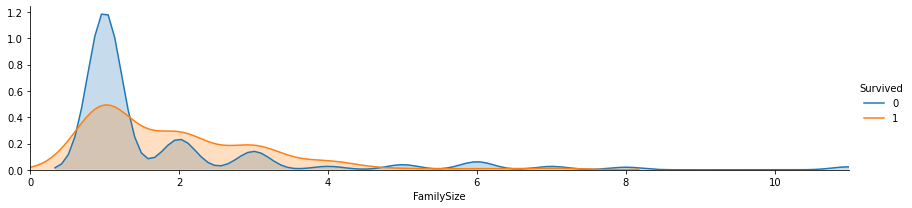

In [52]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect=4) #다중플랏그리드 구성
facet.map(sns.kdeplot, 'FamilySize', shade = True)
facet.add_legend()
facet.set(xlim = (0, train.FamilySize.max()))

In [53]:
tm = {1:0,2:0.4,3:0.8,4:1.2,5:1.6,6:2.0,7:2.4,8:2.8, 9:3.2, 10:3.6, 11:4.0 }

for data in trainTestData:
    data['FamilySize'] = data['FamilySize'].map(tm)

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    float64
 10  Embarked     891 non-null    int64  
 11  title        891 non-null    int64  
 12  Cabin_1      204 non-null    object 
 13  FamilySize   891 non-null    float64
dtypes: float64(4), int64(8), object(2)
memory usage: 97.6+ KB


In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    object 
 4   Cabin       418 non-null    float64
 5   Embarked    418 non-null    int64  
 6   title       417 non-null    float64
 7   FamilySize  417 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 26.2+ KB


In [55]:
train = train.drop(['Ticket','SibSp','Parch'], axis= 1)
test = test.drop(['Ticket','SibSp','Parch'], axis= 1)


In [56]:
train.drop('Cabin_1', axis=1, inplace=True)
test.drop('Cabin_1', axis=1, inplace=True)


In [57]:
train = train.drop(['PassengerId'], axis=1)
trainData = train.drop(['Survived'], axis = 1)
target = train['Survived']

In [58]:
trainData

,Pclass,Sex,Age,Fare,Cabin,Embarked,title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...
886,2,0,2.0,0.0,1.8,0,3,0.0
887,1,1,1.0,1.0,0.4,0,1,0.0
888,3,1,1.0,1.0,2.0,0,1,1.2
889,1,0,1.0,1.0,0.8,1,0,0.0


In [81]:
testData = test.copy()

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [63]:
kfold = KFold(n_splits=10, shuffle= True, random_state= 42)

# KNN

In [65]:
clf = KNeighborsClassifier(n_neighbors=11)
score = cross_val_score(clf, trainData, target, cv = kfold, n_jobs=1, scoring='accuracy')
np.mean(score)

0.8181897627965042

# 의사결정나무

In [68]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, trainData, target, cv = kfold, n_jobs=1, scoring='accuracy')
np.mean(score)

0.795705368289638

# 랜덤포레스트


In [73]:
clf = RandomForestClassifier(n_estimators=15)
score = cross_val_score(clf, trainData, target, cv = kfold, n_jobs=1, scoring='accuracy')
np.mean(score)

0.8192759051186018

# 나이브 베이즈

In [74]:
clf = GaussianNB()
score = cross_val_score(clf, trainData, target, cv = kfold, n_jobs=1, scoring='accuracy')
np.mean(score)

0.7845193508114856

# SVM

In [76]:
clf = SVC()
score = cross_val_score(clf, trainData, target, cv = kfold, n_jobs=1, scoring='accuracy')
np.mean(score)

0.8327465667915106

In [82]:
clf.fit(trainData, target)
prediction = clf.predict(testData)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').